In [1]:
import numpy as np
import pandas as pd

In [55]:
data = pd.read_csv(r"dataset/iris.arff.csv", header=0)
# data.head(10)
# data.tail(10)
print(data.sample(10))
data["class"] = data["class"].map({"Iris-versicolor":0,"Iris-setosa":1,"Iris-virginica":2}) # 类别名称映射为数字
# data = data.drop("Id",axis=1)  # 删除列
print(len(data))
if data.duplicated().any(): # 重复值
    data.drop_duplicates(inplace=True) #删除重复值
    print(len(data))
data["class"].value_counts()  # 查看各个类别的鸢尾花记录


     sepallength  sepalwidth  petallength  petalwidth            class
82           5.8         2.7          3.9         1.2  Iris-versicolor
113          5.7         2.5          5.0         2.0   Iris-virginica
53           5.5         2.3          4.0         1.3  Iris-versicolor
62           6.0         2.2          4.0         1.0  Iris-versicolor
43           5.0         3.5          1.6         0.6      Iris-setosa
72           6.3         2.5          4.9         1.5  Iris-versicolor
2            4.7         3.2          1.3         0.2      Iris-setosa
99           5.7         2.8          4.1         1.3  Iris-versicolor
148          6.2         3.4          5.4         2.3   Iris-virginica
20           5.4         3.4          1.7         0.2      Iris-setosa
150
147


0    50
2    49
1    48
Name: class, dtype: int64

In [82]:
class KNN:
    '''使用KNN实现K近邻算法实现分类'''
    def __init__(self, k):
        '''初始化
        
        Parameters
        -----
        k:int
            邻居个位数
        
        '''
        self.k = k
    def fit(self, X, y):
        '''训练
        
        Parameeters
        -----
        X: 类数组类型，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        y: 类数组类型，形状为：[样本数量]
        
        '''
        self.X = np.asarray(X) #转换为ndarray类型
        self.y = np.asarray(y)
    def predict(self, X):
        '''对样本进行预测
        Parameters:
        X: 类数组类型，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        Returns:
        数组类型，预测结果
        '''
        X = np.asarray(X)
        result = []
        for x in X:
            dis = np.sqrt(np.sum((x-self.X)**2, axis=1)) # 对于测试机的每隔一个样本，一次与训练集的所有数据求欧氏距离
            index = dis.argsort()# 返回排序结果的下标
            index = index[:self.k] # 截取前K个
            count = np.bincount(self.y[index]) # 返回数组中每个整数元素出现次数，元素必须是非负整数
            result.append(count.argmax()) # 返回ndarray中值最大的元素所对应的索引，就是出现次数最多的索引，也就是我们判定的类别
        return np.asarray(result)
    def predict2(self, X):
        '''对样本进行预测，加入权重计算
        Parameters:
        X: 类数组类型，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        Returns:
        数组类型，预测结果
        '''
        X = np.asarray(X)
        result = []
        for x in X:
            dis = np.sqrt(np.sum((x-self.X)**2, axis=1)) # 对于测试机的每隔一个样本，一次与训练集的所有数据求欧氏距离
            index = dis.argsort()# 返回排序结果的下标
            index = index[:self.k] # 截取前K个
            count = np.bincount(self.y[index], weights=1/dis[index]) # 返回数组中每个整数元素出现次数，元素必须是非负整数
            result.append(count.argmax()) # 返回ndarray中值最大的元素所对应的索引，就是出现次数最多的索引，也就是我们判定的类别
        return np.asarray(result)

In [83]:

# 提取每个类中鸢尾花数据
t0 = data[data["class"]==0]
t1 = data[data["class"]==1]
t2 = data[data["class"]==2]
# 打乱# 打乱每个类别数据
t0 = t0.sample(len(t0), random_state=0)
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)
# 分配训练集和数据集，axis=0表示按纵向方式拼接
train_X = pd.concat([t0.iloc[:40, :-1], t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([t0.iloc[:40, -1], t1.iloc[:40, -1], t2.iloc[:40, -1]], axis=0)
test_X = pd.concat([t0.iloc[40:, :-1], t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t0.iloc[40:, -1], t1.iloc[40:, -1], t2.iloc[40:, -1]], axis=0)

In [84]:
knn = KNN(k=3)
knn.fit(X=train_X, y=train_y)
result = knn.predict(test_X)
# display(result)
# display(test_y)
display(np.sum(result==test_y)/len(result))


0.9629629629629629

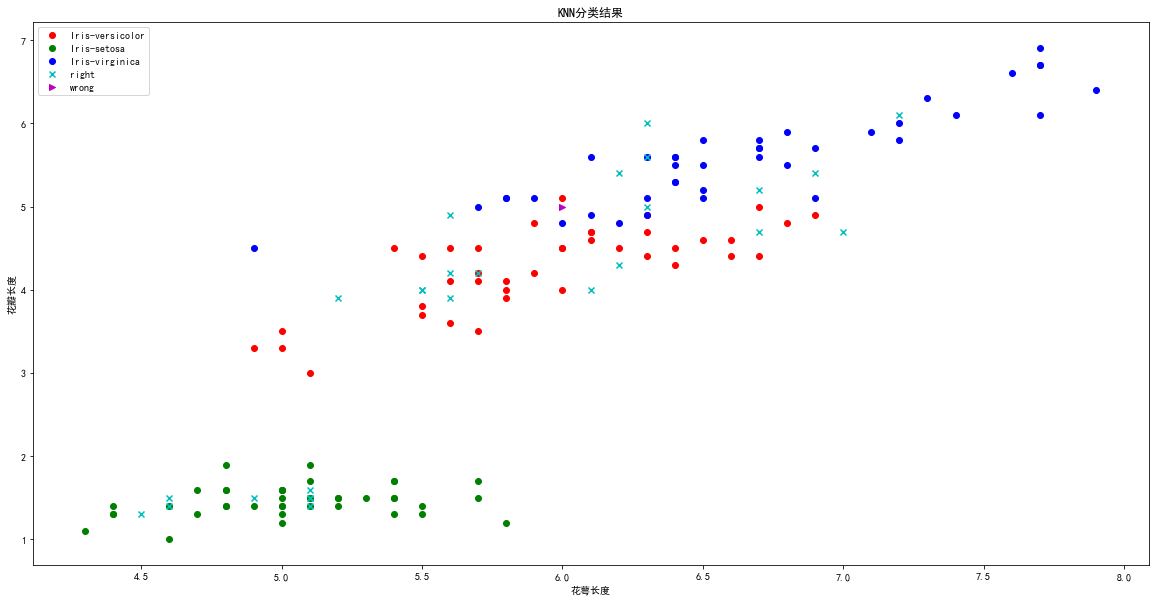

In [85]:
# "Iris-versicolor":0,"Iris-setosa":1,"Iris-virginica":2
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
mpl.rcParams["font.family"] = 'SimHei' # 默认mpl不支持中文，设置一下支持 
mpl.rcParams["axes.unicode_minus"] = False # 设置中文字体是可以正常显示负号
plt.scatter(x=t0["sepallength"][:40], y=t0["petallength"][:40], color='r', label="Iris-versicolor")
plt.scatter(x=t1["sepallength"][:40], y=t1["petallength"][:40], color='g', label="Iris-setosa")
plt.scatter(x=t2["sepallength"][:40], y=t2["petallength"][:40], color='b', label="Iris-virginica")
right = test_X[result == test_y]
wrong = test_X[result != test_y]
plt.scatter(x=right["sepallength"], y=right["petallength"], color='c', label="right", marker="x")
plt.scatter(x=wrong["sepallength"], y=wrong["petallength"], color='m', label="wrong", marker=">")
plt.xlabel('花萼长度')
plt.ylabel('花瓣长度')
plt.title('KNN分类结果')
plt.legend(loc='best')
plt.show()